# 10. Feature generation - all commodities combined (R)

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
good_look <- function(x, start=2, end=5){
    return(x[, c(1:start, (ncol(x) - end):ncol(x))])
}

In [3]:
sample_consolidated_file <- "../preprocessed_data/sample_consolidated_2019-09-10.feather"

## Read data

In [4]:
sample <- feather::read_feather(sample_consolidated_file)
glimpse(sample)

Observations: 2,123
Variables: 23
$ YEAR                  <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,…
$ COMMODITY             <chr> "crude", "hvl", "non-hvl", "hvl", "non-hvl", "h…
$ OPERATOR_ID           <chr> "BP (Group)", "BP (Group)", "BP (Group)", "Chev…
$ NAME                  <chr> "BP (Group)", "BP (Group)", "BP (Group)", "Chev…
$ MILES                 <dbl> 36.00, 539.00, 1272.00, 1206.00, 1038.00, 296.0…
$ AGE_UNKNOWN_MILES     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MILES_PRE_1940        <dbl> 1.0, 0.0, 152.0, 0.0, 13.0, 0.0, 0.0, 0.0, 0.0,…
$ MILES_1940            <dbl> 1, 0, 43, 8, 48, 64, 0, 0, 0, 15, 0, 729, 0, 0,…
$ MILES_1950            <dbl> 4.0, 0.0, 498.0, 486.0, 1344.0, 54.0, 243.0, 0.…
$ MILES_1960            <dbl> 7.0, 280.0, 524.0, 328.0, 222.0, 139.0, 539.0, …
$ MILES_1970            <dbl> 5.00, 631.00, 786.00, 411.00, 14.00, 104.00, 0.…
$ MILES_1980            <dbl> 2.0, 36.0, 41.0, 163.0, 19.0, 13.0, 0.0, 0.0, 0…
$ MILES_1990      

## Alternatively: filter large changes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 209 rows containing non-finite values (stat_bin).”

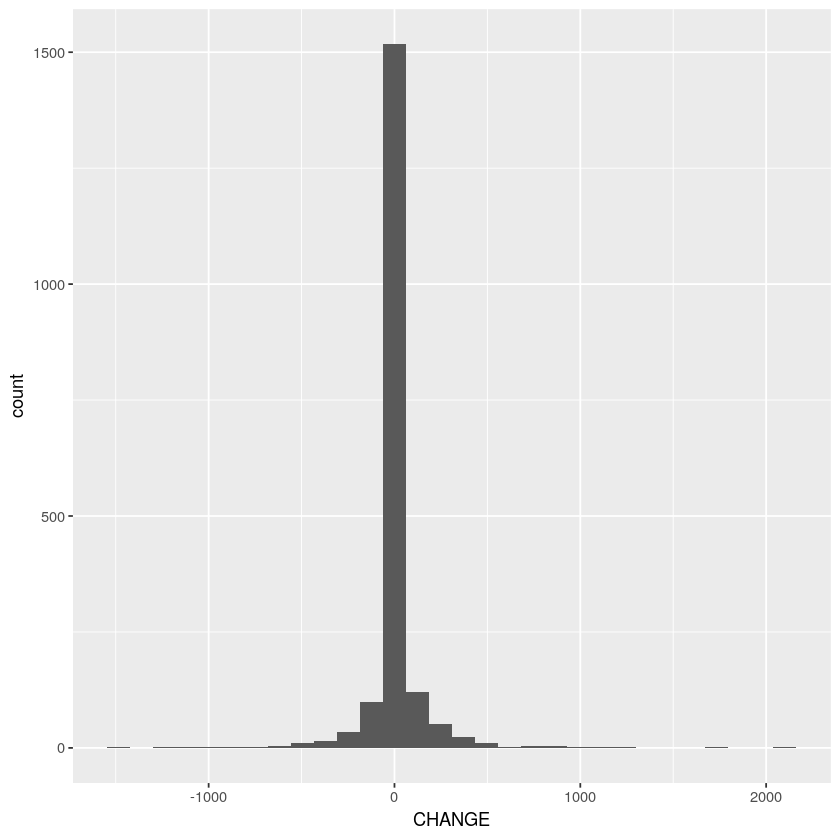

In [5]:
sample %>%
    ggplot(aes(x=CHANGE)) +
        geom_histogram()

In [6]:
nrow(sample)

[1] 2123

In [7]:
# sample <- subset(sample, abs(CHANGE) < 250)

In [8]:
sample <- subset(sample, COMMODITY %in% c("crude", "hvl", "non-hvl"))
table(sample$COMMODITY)


  crude     hvl non-hvl 
    716     675     732 

In [9]:
nrow(sample)

[1] 2123

## Alternatively: combine all commodities

In [10]:
m_as <- sample %>%
    group_by(OPERATOR_ID, YEAR) %>%
    summarize(M_A = TRUE %in% M_A)
glimpse(m_as)

Observations: 1,154
Variables: 3
Groups: OPERATOR_ID [99]
$ OPERATOR_ID <chr> "10012", "10012", "10012", "1248", "1248", "1248", "1248"…
$ YEAR        <dbl> 2004, 2005, 2006, 2004, 2005, 2006, 2007, 2008, 2009, 201…
$ M_A         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


In [11]:
sample_selected <- select(sample, YEAR, COMMODITY, OPERATOR_ID, MILES, AGE_UNKNOWN_MILES, MILES_1940, MILES_1950, MILES_1960, 
                 MILES_1970, MILES_1980, MILES_1990, MILES_2000, MILES_2010, INCIDENTS, SIGNIFICANT_INCIDENTS, AVG_AGE)

sample_selected <- sample_selected %>%
    gather(variable, value, -c(YEAR, OPERATOR_ID, COMMODITY)) %>%
    mutate(COMMODITY = toupper(COMMODITY)) %>%
    mutate(COMMODITY = recode(COMMODITY, `NON-HVL` = "NON_HVL")) %>%
    unite(temp, COMMODITY, variable) %>%
    spread(temp, value)

glimpse(sample_selected)

Observations: 1,154
Variables: 41
$ YEAR                          <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 200…
$ OPERATOR_ID                   <chr> "10012", "1248", "14194", "15156", "193…
$ CRUDE_AGE_UNKNOWN_MILES       <dbl> NA, 0, 0, 0, NA, NA, 0, 0, 0, 0, NA, NA…
$ CRUDE_AVG_AGE                 <dbl> NA, 49.24460, 42.89474, 46.82628, NA, N…
$ CRUDE_INCIDENTS               <dbl> NA, 0, 0, 1, NA, NA, 0, 0, 4, 2, NA, NA…
$ CRUDE_MILES                   <dbl> NA, 75.00, 19.00, 210.00, NA, NA, 4.00,…
$ CRUDE_MILES_1940              <dbl> NA, 0, 0, 26, NA, NA, 0, 0, 44, 0, NA, …
$ CRUDE_MILES_1950              <dbl> NA, 0, 0, 0, NA, NA, 4, 0, 209, 94, NA,…
$ CRUDE_MILES_1960              <dbl> NA, 152, 0, 175, NA, NA, 0, 0, 0, 0, NA…
$ CRUDE_MILES_1970              <dbl> NA, 109, 15, 179, NA, NA, 0, 0, 409, 47…
$ CRUDE_MILES_1980              <dbl> NA, 0, 4, 0, NA, NA, 0, 0, 818, 0, NA, …
$ CRUDE_MILES_1990              <dbl> NA, 17, 0, 36, NA, NA, 0, 0, 199, 24, N…
$ CRUDE_MILES_2000

In [12]:
potentially_empty_cols <- colnames(sample_selected)
potentially_empty_cols <- potentially_empty_cols[!potentially_empty_cols %in% c('YEAR', 'OPERATOR_ID')]
head(potentially_empty_cols)

[1] "CRUDE_AGE_UNKNOWN_MILES" "CRUDE_AVG_AGE"          
[3] "CRUDE_INCIDENTS"         "CRUDE_MILES"            
[5] "CRUDE_MILES_1940"        "CRUDE_MILES_1950"

In [13]:
sample_selected <- sample_selected %>%
    mutate_at(potentially_empty_cols, ~replace_na(., 0))

sample_selected$SIGNIFICANT_INCIDENTS <- (sample_selected$CRUDE_SIGNIFICANT_INCIDENTS + 
                                          sample_selected$HVL_SIGNIFICANT_INCIDENTS + 
                                          sample_selected$NON_HVL_SIGNIFICANT_INCIDENTS)

glimpse(good_look(sample_selected))

Observations: 1,154
Variables: 8
$ YEAR                          <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 200…
$ OPERATOR_ID                   <chr> "10012", "1248", "14194", "15156", "193…
$ NON_HVL_MILES_1980            <dbl> 359.00, 0.00, 0.00, 3.00, 0.00, 0.00, 0…
$ NON_HVL_MILES_1990            <dbl> 10.0, 37.0, 8.0, 29.0, 0.0, 0.0, 0.0, 0…
$ NON_HVL_MILES_2000            <dbl> 0.00, 0.00, 0.00, 23.00, 0.00, 0.00, 0.…
$ NON_HVL_MILES_2010            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ NON_HVL_SIGNIFICANT_INCIDENTS <dbl> 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, …
$ SIGNIFICANT_INCIDENTS         <dbl> 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 1, 1, 1, …


## 10.1 Calculate change

### 10.1.1 For construction only

In [14]:
all_colls <- colnames(sample_selected)
non_miles_cols <- c('YEAR', 'OPERATOR_ID', 'CRUDE_INCIDENTS', 'CRUDE_SIGNIFICANT_INCIDENTS',
                    'HVL_INCIDENTS', 'HVL_SIGNIFICANT_INCIDENTS', 'NON_HVL_INCIDENTS', 
                    'NON_HVL_SIGNIFICANT_INCIDENTS', 'SIGNIFICANT_INCIDENTS', 'CRUDE_MILES', 'CRUDE_AVG_AGE',
                    'HVL_MILES', 'HVL_AVG_AGE', 'NON_HVL_MILES', 'NON_HVL_AVG_AGE')
miles_cols <- all_colls[!all_colls %in% non_miles_cols]

In [15]:
return_positive <- function(x){
    if (is.na(x)){
        
    } else if (x < 0){
        x = 0
    }
    return(x)
}
return_positive(-2)

[1] 0

In [16]:
return_negative <- function(x){
    if (is.na(x)){
        
    } else if (x > 0){
        x = 0
    }
    return(x)
}
return_negative(20)

[1] 0

In [17]:
added_removed <- sample_selected %>%
    gather(variable, value, one_of(miles_cols)) %>%
    group_by(variable, OPERATOR_ID) %>% 
    arrange(desc(YEAR)) %>%
    mutate(added = sapply(value - lag(value), return_positive), 
           removed = sapply(value - lag(value), return_negative)) %>%  
    select(YEAR, OPERATOR_ID, variable, added, removed) %>%
    group_by(OPERATOR_ID, YEAR) %>%
    summarize(ADDED = sum(added),
              REMOVED = sum(removed))

In [18]:
sample_selected <- left_join(sample_selected, added_removed, by=c('OPERATOR_ID', 'YEAR'))
glimpse(good_look(sample_selected))

Observations: 1,154
Variables: 8
$ YEAR                          <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 200…
$ OPERATOR_ID                   <chr> "10012", "1248", "14194", "15156", "193…
$ NON_HVL_MILES_2000            <dbl> 0.00, 0.00, 0.00, 23.00, 0.00, 0.00, 0.…
$ NON_HVL_MILES_2010            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ NON_HVL_SIGNIFICANT_INCIDENTS <dbl> 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, …
$ SIGNIFICANT_INCIDENTS         <dbl> 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 1, 1, 1, …
$ ADDED                         <dbl> 290.140, 0.000, 0.000, 2.000, 0.000, 0.…
$ REMOVED                       <dbl> 0.000, 0.000, 0.000, -7.000, -42.600, 0…


In [19]:
sample_selected <- sample_selected %>%
    mutate(TOTAL_MILES = rowSums(select(., one_of(miles_cols))))

In [20]:
table(round(subset(sample_selected, TOTAL_MILES < 10, TOTAL_MILES), 2))


   0 0.06  1.6 3.25 3.33 4.68  4.9  5.2  5.3 5.34  5.5 5.52 7.21    8 
  81   14    1    1    2    4    1    4    2    2    3    6    1    4 

Change does not make sense, when organization has zero miles of pipeline network.

In [21]:
sample_selected <- subset(sample_selected, TOTAL_MILES > 0)

In [22]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    mutate(ADDED_PERC = ADDED/(lag(TOTAL_MILES)
                              ), 
                              # + 0.01), 
           REMOVED_PERC = REMOVED/(lag(TOTAL_MILES)
                              )) 
                              # + 0.01))
tail(sample_selected)

YEAR,OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,⋯,NON_HVL_MILES_1990,NON_HVL_MILES_2000,NON_HVL_MILES_2010,NON_HVL_SIGNIFICANT_INCIDENTS,SIGNIFICANT_INCIDENTS,ADDED,REMOVED,TOTAL_MILES,ADDED_PERC,REMOVED_PERC
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,Sunoco (Group),429.69,48.84636,20,4008.780,500.35,519.030,190.83,99.300,⋯,45.980,5.250,168.030,1,11,NA,NA,6057.480,NA,NA
2018,Targa (Group),0.00,5.00000,0,36.500,0.00,0.000,0.00,0.000,⋯,0.000,1.860,0.000,0,0,NA,NA,1310.320,NA,NA
2018,Tesoro (Group),5.50,38.93026,0,263.500,0.30,157.300,57.00,40.100,⋯,11.200,7.200,0.800,0,0,NA,NA,1379.380,NA,NA
2018,Torrance (Group),0.00,31.02596,4,166.500,0.00,0.000,0.00,59.702,⋯,2.412,5.736,1.078,0,1,NA,NA,390.660,NA,NA
2018,Valero (Group),0.00,43.29019,0,92.377,0.00,84.333,40.25,0.000,⋯,0.367,17.355,148.752,1,1,NA,NA,491.369,NA,NA
2018,Williams Field Services (Group),0.00,5.00000,0,0.150,0.00,0.000,0.00,0.000,⋯,0.090,0.012,0.010,0,1,NA,NA,1616.614,NA,NA


In [23]:
table(round(sample_selected$ADDED_PERC, 2))


   0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09  0.1 0.11 0.12 0.13 0.14 0.15 
 445   64   44   44   22   27   15   21   14   12   14   11    8    3    5    7 
0.16 0.17 0.18 0.19  0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29  0.3 0.31 
   6    6    6    3    4    2    4    1    6    5    4    1    4    2    3    1 
0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39  0.4 0.41 0.42 0.43 0.46 0.47 0.48  0.5 
   4    1    2    4    4    1    3    1    2    3    1    1    1    3    3    1 
0.51 0.52 0.54 0.55 0.56 0.57 0.58 0.59 0.62 0.63 0.64 0.65 0.71 0.75 0.77 0.78 
   1    1    1    1    1    2    1    1    1    1    1    1    2    1    2    1 
 0.8 0.81 0.85 0.87 0.92 0.94 0.98    1 1.01 1.13  1.8 3.03 5.67 5.97 
   1    2    2    1    1    2    2    6    2    1    1    1    1    1 

In [24]:
sample_selected %>%
    filter(OPERATOR_ID == 'Sunoco (Group)') %>%
    select(YEAR, OPERATOR_ID, ADDED, REMOVED, TOTAL_MILES, ADDED_PERC, REMOVED_PERC)

YEAR,OPERATOR_ID,ADDED,REMOVED,TOTAL_MILES,ADDED_PERC,REMOVED_PERC
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004,Sunoco (Group),4.39,-208.44,850.00,NA,NA
2005,Sunoco (Group),16.58,-23.30,1054.05,1.950588e-02,-0.027411765
2006,Sunoco (Group),1.00,-0.28,1060.77,9.487216e-04,-0.000265642
2007,Sunoco (Group),0.61,-381.33,1060.05,5.750540e-04,-0.359484148
2008,Sunoco (Group),237.38,-34.58,1440.77,2.239328e-01,-0.032621103
2009,Sunoco (Group),0.20,-391.84,1237.97,1.388147e-04,-0.271965685
2010,Sunoco (Group),3.10,-3.04,1629.61,2.504099e-03,-0.002455633
2011,Sunoco (Group),0.00,-270.00,1629.55,0.000000e+00,-0.165683814
2012,Sunoco (Group),0.05,-2448.63,1899.55,3.068332e-05,-1.502641834


I seem to be losing 2018 for some reason. But since we are using the moving average of incidents, we cannot use that observation in our model anyways.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 93 rows containing non-finite values (stat_bin).”

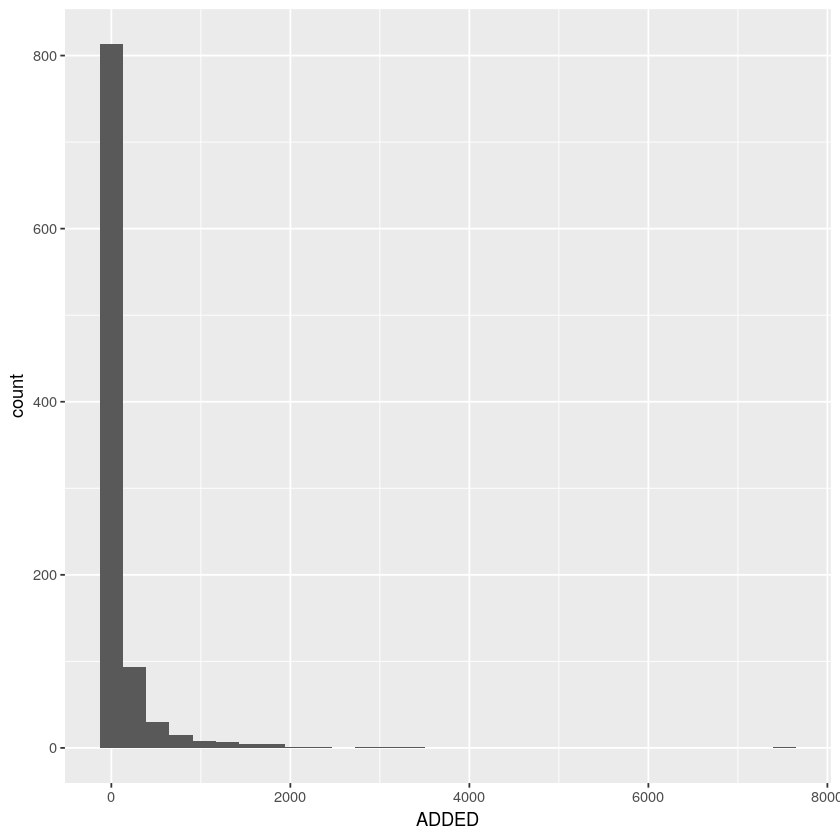

In [25]:
sample_selected %>%
    ggplot(aes(x=ADDED)) +
        geom_histogram()

### 10.1.2 Overall

In [26]:
sample_selected <- sample_selected%>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(CHANGE_TOTAL = TOTAL_MILES - lag(TOTAL_MILES)) %>%
    mutate(CHANGE_PERC = CHANGE_TOTAL / lag(TOTAL_MILES)) %>%
    mutate(MEAN_CHANGE_3 = (CHANGE_PERC + lag(CHANGE_PERC) + lag(CHANGE_PERC)) / 3) %>%
    mutate(CHANGE_SD = ((CHANGE_PERC - MEAN_CHANGE_3)^2 + (lag(CHANGE_PERC) - MEAN_CHANGE_3)^2 + (lag(CHANGE_PERC, 2) - MEAN_CHANGE_3)^2) / 2) %>%
    mutate(CHANGE_SD_SQ = CHANGE_SD^2,
           CHANGE_EXP = exp(CHANGE_SD))

In [27]:
    table(round(sample_selected$CHANGE_SD, 1))


    0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9     1   1.1   1.3 
  576    87    34    29     8     5     6     4     7     1     2     2     2 
  1.4   1.5   1.7   1.8   1.9   2.1   2.2   2.3   2.4   2.6   2.8   2.9     3 
    1     1     1     1     1     1     1     1     1     2     1     1     1 
  3.2   3.6     4   4.5   4.7     6   6.1  14.9    15  16.7  22.2  22.6  23.1 
    1     1     1     2     2     1     1     1     1     1     1     2     1 
 25.4    34  36.9  41.6  43.5  47.4  59.8  80.9 122.3 125.1  1691 
    1     1     1     1     1     1     1     1     1     1     1 

In [28]:
sample_selected <- subset(sample_selected, CHANGE_SD < 10)

## 10.2 N-year averages

### 10.2.1 Incidents

In [29]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(INC_3 = SIGNIFICANT_INCIDENTS + lead(SIGNIFICANT_INCIDENTS) + lead(SIGNIFICANT_INCIDENTS, 2), 
           INC_4 = SIGNIFICANT_INCIDENTS + lead(SIGNIFICANT_INCIDENTS) + lead(SIGNIFICANT_INCIDENTS, 2) + lead(SIGNIFICANT_INCIDENTS, 3), 
           INC_5 = SIGNIFICANT_INCIDENTS + lead(SIGNIFICANT_INCIDENTS) + lead(SIGNIFICANT_INCIDENTS, 2) + lead(SIGNIFICANT_INCIDENTS, 3) + lead(SIGNIFICANT_INCIDENTS, 4))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 20…
$ OPERATOR_ID  <chr> "1248", "14194", "15156", "19319", "22430", "22855", "25…
$ CHANGE_SD    <dbl> 4.912316e-04, 0.000000e+00, 1.235392e-04, 3.086159e-01, …
$ CHANGE_SD_SQ <dbl> 2.413085e-07, 0.000000e+00, 1.526193e-08, 9.524379e-02, …
$ CHANGE_EXP   <dbl> 1.000491, 1.000000, 1.000124, 1.361539, 1.000091, 1.0000…
$ INC_3        <dbl> 3, 0, 4, 0, 1, 10, 0, 15, 11, 1, 0, 0, 0, 0, 4, 0, 5, 4,…
$ INC_4        <dbl> 4, 0, 5, 0, 3, 12, 0, 18, 17, 1, 1, 0, 0, 1, 6, 0, 5, 8,…
$ INC_5        <dbl> 8, 0, 5, 0, 5, 12, 1, 20, 20, 1, 1, 0, 0, 1, 6, 1, 6, 8,…


In [30]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(DISC_ADDED = 2/3 * ADDED_PERC + lag(ADDED_PERC) + 2/3 * lag(ADDED_PERC, 2) + 1/3 * lag(ADDED_PERC, 3),
           DISC_ADDED_ALT = ADDED_PERC + 2/3 * lag(ADDED_PERC) + 1/3 * lag(ADDED_PERC, 2), 
           DISC_ADDED_ALT2 = 1 * ADDED_PERC + lag(ADDED_PERC) + 2/3 * lag(ADDED_PERC, 2) + 1/3 * lag(ADDED_PERC, 3)) %>%
    mutate(REMOVED_ADJ = sapply(abs(REMOVED_PERC) - ADDED_PERC, return_positive)) %>%
    mutate(CONSOLIDATE = REMOVED_ADJ + lag(REMOVED_ADJ, 1) + lag(REMOVED_ADJ, 2))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR            <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ OPERATOR_ID     <chr> "1248", "14194", "15156", "19319", "22430", "22855", …
$ INC_5           <dbl> 8, 0, 5, 0, 5, 12, 1, 20, 20, 1, 1, 0, 0, 1, 6, 1, 6,…
$ DISC_ADDED      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ DISC_ADDED_ALT  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ DISC_ADDED_ALT2 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ REMOVED_ADJ     <dbl> 0.001283697, 0.000000000, 0.015005359, 20.117572464, …
$ CONSOLIDATE     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


### 10.2.2 Miles & Age

In [31]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(CRUDE_MILES_3 = CRUDE_MILES + lead(CRUDE_MILES) + lead(CRUDE_MILES, 2), 
           HVL_MILES_3 = HVL_MILES + lead(HVL_MILES) + lead(HVL_MILES, 2), 
           NON_HVL_MILES_3 = NON_HVL_MILES + lead(NON_HVL_MILES) + lead(NON_HVL_MILES, 2))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR            <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ OPERATOR_ID     <chr> "1248", "14194", "15156", "19319", "22430", "22855", …
$ DISC_ADDED_ALT2 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ REMOVED_ADJ     <dbl> 0.001283697, 0.000000000, 0.015005359, 20.117572464, …
$ CONSOLIDATE     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ CRUDE_MILES_3   <dbl> 332.000, 40.620, 559.000, 0.000, 10.746, 2962.620, 44…
$ HVL_MILES_3     <dbl> 0.000, 0.000, 0.000, 343.020, 0.000, 1121.860, 1912.8…
$ NON_HVL_MILES_3 <dbl> 0.000, 45.680, 1032.000, 55.444, 1213.692, 2464.780, …


In [32]:
sample_selected$CRUDE_AVG_AGE <- ((sample_selected$CRUDE_MILES_1940 * (sample_selected$YEAR - 1945)) + 
                                  (sample_selected$CRUDE_MILES_1950 * (sample_selected$YEAR - 1955)) +
                                  (sample_selected$CRUDE_MILES_1960 * (sample_selected$YEAR - 1965)) +
                                  (sample_selected$CRUDE_MILES_1970 * (sample_selected$YEAR - 1975)) +
                                  (sample_selected$CRUDE_MILES_1980 * (sample_selected$YEAR - 1985)) +
                                  (sample_selected$CRUDE_MILES_1990 * (sample_selected$YEAR - 1995)) +
                                  (sample_selected$CRUDE_MILES_2000 * (sample_selected$YEAR - 2005)) +
                                  (sample_selected$CRUDE_MILES_2010 * (sample_selected$YEAR - 2015))) / 
                                  (sample_selected$CRUDE_MILES_1940 +
                                   sample_selected$CRUDE_MILES_1950 +
                                   sample_selected$CRUDE_MILES_1960 +
                                   sample_selected$CRUDE_MILES_1970 +
                                   sample_selected$CRUDE_MILES_1980 +
                                   sample_selected$CRUDE_MILES_1990 +
                                   sample_selected$CRUDE_MILES_2000 +
                                   sample_selected$CRUDE_MILES_2010
                                  # ) 
                                  + 0.01)

sample_selected$HVL_AVG_AGE <-   ((sample_selected$HVL_MILES_1940 * (sample_selected$YEAR - 1945)) + 
                                  (sample_selected$HVL_MILES_1950 * (sample_selected$YEAR - 1955)) +
                                  (sample_selected$HVL_MILES_1960 * (sample_selected$YEAR - 1965)) +
                                  (sample_selected$HVL_MILES_1970 * (sample_selected$YEAR - 1975)) +
                                  (sample_selected$HVL_MILES_1980 * (sample_selected$YEAR - 1985)) +
                                  (sample_selected$HVL_MILES_1990 * (sample_selected$YEAR - 1995)) +
                                  (sample_selected$HVL_MILES_2000 * (sample_selected$YEAR - 2005)) +
                                  (sample_selected$HVL_MILES_2010 * (sample_selected$YEAR - 2015))) / 
                                  (sample_selected$HVL_MILES_1940 +
                                   sample_selected$HVL_MILES_1950 +
                                   sample_selected$HVL_MILES_1960 +
                                   sample_selected$HVL_MILES_1970 +
                                   sample_selected$HVL_MILES_1980 +
                                   sample_selected$HVL_MILES_1990 +
                                   sample_selected$HVL_MILES_2000 +
                                   sample_selected$HVL_MILES_2010
                                  # ) 
                                  + 0.01)

sample_selected$NON_HVL_AVG_AGE <- ((sample_selected$NON_HVL_MILES_1940 * (sample_selected$YEAR - 1945)) + 
                                    (sample_selected$NON_HVL_MILES_1950 * (sample_selected$YEAR - 1955)) +
                                    (sample_selected$NON_HVL_MILES_1960 * (sample_selected$YEAR - 1965)) +
                                    (sample_selected$NON_HVL_MILES_1970 * (sample_selected$YEAR - 1975)) +
                                    (sample_selected$NON_HVL_MILES_1980 * (sample_selected$YEAR - 1985)) +
                                    (sample_selected$NON_HVL_MILES_1990 * (sample_selected$YEAR - 1995)) +
                                    (sample_selected$NON_HVL_MILES_2000 * (sample_selected$YEAR - 2005)) +
                                    (sample_selected$NON_HVL_MILES_2010 * (sample_selected$YEAR - 2015))) / 
                                    (sample_selected$NON_HVL_MILES_1940 +
                                     sample_selected$NON_HVL_MILES_1950 +
                                     sample_selected$NON_HVL_MILES_1960 +
                                     sample_selected$NON_HVL_MILES_1970 +
                                     sample_selected$NON_HVL_MILES_1980 +
                                     sample_selected$NON_HVL_MILES_1990 +
                                     sample_selected$NON_HVL_MILES_2000 +
                                     sample_selected$NON_HVL_MILES_2010
                                    # ) 
                                    + 0.01)

glimpse(sample_selected)

Observations: 786
Variables: 64
Groups: OPERATOR_ID [83]
$ YEAR                          <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ OPERATOR_ID                   <chr> "1248", "14194", "15156", "19319", "224…
$ CRUDE_AGE_UNKNOWN_MILES       <dbl> 0.000, 0.000, 0.000, 0.000, 0.000, 0.00…
$ CRUDE_AVG_AGE                 <dbl> 38.587502, 0.000000, 38.549180, 0.00000…
$ CRUDE_INCIDENTS               <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, …
$ CRUDE_MILES                   <dbl> 64.000, 0.000, 211.000, 0.000, 3.582, 7…
$ CRUDE_MILES_1940              <dbl> 0.0, 0.0, 79.0, 0.0, 0.0, 0.0, 0.0, 0.0…
$ CRUDE_MILES_1950              <dbl> 0.000, 0.000, 10.000, 0.000, 3.554, 213…
$ CRUDE_MILES_1960              <dbl> 359.000, 0.000, 168.000, 0.000, 0.023, …
$ CRUDE_MILES_1970              <dbl> 149.000, 0.000, 113.000, 0.000, 0.000, …
$ CRUDE_MILES_1980              <dbl> 63.000, 0.000, 0.000, 0.000, 0.000, 767…
$ CRUDE_MILES_1990              <dbl> 18.000, 0.000, 15.000, 0.000, 0.000,

In [33]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(CRUDE_AVG_AGE_3 =   (CRUDE_AVG_AGE * CRUDE_MILES + 
                                lag(CRUDE_AVG_AGE, 1) * lag(CRUDE_MILES, 1) + 
                                lag(CRUDE_AVG_AGE, 2) * lag(CRUDE_MILES, 2)) /
                                (CRUDE_MILES + lag(CRUDE_MILES, 1) + lag(CRUDE_MILES, 2)       # ),
                                                                                               + 0.01), 
           HVL_AVG_AGE_3 =     (HVL_AVG_AGE * HVL_MILES + 
                                lag(HVL_AVG_AGE, 1) * lag(HVL_MILES, 1) + 
                                lag(HVL_AVG_AGE, 2) * lag(HVL_MILES, 2)) /
                                (HVL_MILES + lag(HVL_MILES, 1) + lag(HVL_MILES, 2)             # ), 
                                                                                               + 0.01), 
           NON_HVL_AVG_AGE_3 = (NON_HVL_AVG_AGE * NON_HVL_MILES + 
                                lag(NON_HVL_AVG_AGE, 1) * lag(NON_HVL_MILES, 1) + 
                                lag(NON_HVL_AVG_AGE, 2) * lag(NON_HVL_MILES, 2)) /
                                (NON_HVL_MILES + lag(NON_HVL_MILES, 1) + lag(NON_HVL_MILES, 2) # )) 
                                                                                               + 0.01))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR              <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ OPERATOR_ID       <chr> "1248", "14194", "15156", "19319", "22430", "22855"…
$ CRUDE_MILES_3     <dbl> 332.000, 40.620, 559.000, 0.000, 10.746, 2962.620, …
$ HVL_MILES_3       <dbl> 0.000, 0.000, 0.000, 343.020, 0.000, 1121.860, 1912…
$ NON_HVL_MILES_3   <dbl> 0.000, 45.680, 1032.000, 55.444, 1213.692, 2464.780…
$ CRUDE_AVG_AGE_3   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ HVL_AVG_AGE_3     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ NON_HVL_AVG_AGE_3 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…


In [34]:
table(round(sample_selected$NON_HVL_AVG_AGE_3))


  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
194   3   2   1   1   2   2   2   3   3   2   3   4   3   5   5   6   6   5   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  7  10   9   9  19   7   5   6   7   4   8   5  15  20  30  20  13  16  13   8 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58 
  9  11   8   5   8  13  20  14  12   6  10   3   3   1   3   1   4   3 

### 10.2.3 Add control for no miles to "switch off" (absorb variance) from age

In [35]:
sample_selected$NO_CRUDE <- sample_selected$CRUDE_MILES_3 == 0
sample_selected$NO_HVL <- sample_selected$HVL_MILES_3 == 0
sample_selected$NO_NON_HVL <- sample_selected$NON_HVL_MILES_3 == 0

# 10.3 M&As

In [36]:
sample_selected <- left_join(sample_selected, m_as, by=c('OPERATOR_ID', 'YEAR'))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR              <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ OPERATOR_ID       <chr> "1248", "14194", "15156", "19319", "22430", "22855"…
$ HVL_AVG_AGE_3     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ NON_HVL_AVG_AGE_3 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ NO_CRUDE          <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, TRU…
$ NO_HVL            <lgl> TRUE, TRUE, TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, …
$ NO_NON_HVL        <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ M_A               <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…


In [37]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(M_A_1 = lead(M_A), M_A_2 = lead(M_A, 2), M_A_3 = lead(M_A, 3)) %>%
    mutate(M_A_past_3 = TRUE %in% c(M_A, M_A_1, M_A_2))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR        <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ OPERATOR_ID <chr> "1248", "14194", "15156", "19319", "22430", "22855", "251…
$ NO_NON_HVL  <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
$ M_A         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_1       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_2       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_3       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_past_3  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


## 10.4 Change SD

In [38]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(ADDED_1 = lead(ADDED_PERC, 1), 
           ADDED_2 = lead(ADDED_PERC, 2))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR        <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ OPERATOR_ID <chr> "1248", "14194", "15156", "19319", "22430", "22855", "251…
$ M_A_1       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_2       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_3       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ M_A_past_3  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ ADDED_1     <dbl> 0.0589285714, 0.0000000000, 0.1094339623, 0.0000000000, 0…
$ ADDED_2     <dbl> 7.454545e-02, 0.000000e+00, 1.593186e-01, 0.000000e+00, 2…


In [39]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(ADDED_1 = lead(ADDED_PERC, 0), 
           ADDED_2 = lag(ADDED_PERC, 1), 
           ADDED_3 = lag(ADDED_PERC, 2)) %>%
    mutate(MEAN_ADDED_3 = (ADDED_1 + ADDED_2 + ADDED_3) / 3) %>%
    mutate(SD_ADDED_3 = sqrt(((ADDED_1 - MEAN_ADDED_3)^2 + (ADDED_2 - MEAN_ADDED_3)^2 + (ADDED_3 - MEAN_ADDED_3)^2) / 3)) %>%
    mutate(SD_ADDED_3_EXP = exp(SD_ADDED_3))
glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR           <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, …
$ OPERATOR_ID    <chr> "1248", "14194", "15156", "19319", "22430", "22855", "…
$ ADDED_1        <dbl> 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.610507e-01…
$ ADDED_2        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ ADDED_3        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ MEAN_ADDED_3   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ SD_ADDED_3     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ SD_ADDED_3_EXP <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


In [40]:
table(round(sample_selected$SD_ADDED_3, 2))


   0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09  0.1 0.11 0.12 0.13 0.14 0.15 
 141   48   48   34   34   21   19   13   12   11   13   12    7    4   13   11 
0.16 0.17 0.18 0.19  0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.31 0.33 
  10   13    4    3    4    7    2    3    6    3    3    5    1    1    1    3 
0.35 0.36 0.37  0.4 0.41 0.42 0.44 0.45 0.46 0.47 0.48  0.8 0.81 0.84 2.67 
   3    6    3    3    1    2    3    2    1    2    3    1    1    1    3 

### 10.4.1 Filter large observations for now

In [41]:
# sample_selected <- subset(sample_selected, SD_ADDED_3 < 5)

## 10.5 Fill NA (where appropriate) 

In [42]:
sample_selected[is.na(sample_selected$CRUDE_AVG_AGE_3), ] %>%
    select(starts_with("CRUDE")) %>%
    head()

Adding missing grouping variables: `OPERATOR_ID`


OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,CRUDE_MILES_1980,CRUDE_MILES_1990,CRUDE_MILES_2000,CRUDE_MILES_2010,CRUDE_SIGNIFICANT_INCIDENTS,CRUDE_MILES_3,CRUDE_AVG_AGE_3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1248,0,38.58750,1,64.000,0,0.000,359.000,149.00,63.00,18.00,35.00,63.000,1,332.000,NA
14194,0,0.00000,0,0.000,0,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0,40.620,NA
15156,0,38.54918,0,211.000,79,10.000,168.000,113.00,0.00,15.00,112.00,34.000,0,559.000,NA
19319,0,0.00000,0,0.000,0,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0,0.000,NA
22430,0,59.68541,0,3.582,0,3.554,0.023,0.00,0.00,0.00,0.00,0.005,0,10.746,NA
22855,0,29.24262,1,798.900,0,213.880,0.000,264.61,767.67,76.43,316.71,109.610,1,2962.620,NA


## 10.5 Interaction etc.

In [43]:
sample_selected$SD_ADDED_3_EXP_SQ <- sample_selected$SD_ADDED_3_EXP^2
sample_selected$SDxADDED <- sample_selected$SD_ADDED_3_EXP * sample_selected$DISC_ADDED

sample_selected$CRUDExAGE <- sample_selected$CRUDE_MILES_3 * sample_selected$CRUDE_AVG_AGE_3
sample_selected$HVLxAGE <- sample_selected$HVL_MILES_3 * sample_selected$HVL_AVG_AGE_3
sample_selected$NON_HVLxAGE <- sample_selected$NON_HVL_MILES_3 * sample_selected$NON_HVL_AVG_AGE_3

In [44]:
glimpse(sample_selected)

Observations: 786
Variables: 86
Groups: OPERATOR_ID [83]
$ YEAR                          <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ OPERATOR_ID                   <chr> "1248", "14194", "15156", "19319", "224…
$ CRUDE_AGE_UNKNOWN_MILES       <dbl> 0.000, 0.000, 0.000, 0.000, 0.000, 0.00…
$ CRUDE_AVG_AGE                 <dbl> 38.587502, 0.000000, 38.549180, 0.00000…
$ CRUDE_INCIDENTS               <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, …
$ CRUDE_MILES                   <dbl> 64.000, 0.000, 211.000, 0.000, 3.582, 7…
$ CRUDE_MILES_1940              <dbl> 0.0, 0.0, 79.0, 0.0, 0.0, 0.0, 0.0, 0.0…
$ CRUDE_MILES_1950              <dbl> 0.000, 0.000, 10.000, 0.000, 3.554, 213…
$ CRUDE_MILES_1960              <dbl> 359.000, 0.000, 168.000, 0.000, 0.023, …
$ CRUDE_MILES_1970              <dbl> 149.000, 0.000, 113.000, 0.000, 0.000, …
$ CRUDE_MILES_1980              <dbl> 63.000, 0.000, 0.000, 0.000, 0.000, 767…
$ CRUDE_MILES_1990              <dbl> 18.000, 0.000, 15.000, 0.000, 0.000,

## 10.6 With extreme detail

In [45]:
sample_selected <- sample_selected %>%
    group_by(OPERATOR_ID) %>%
    arrange(desc(YEAR)) %>%
    mutate(CRUDE_MILES_1940_3 = (     CRUDE_MILES_1940 + 
                                 lead(CRUDE_MILES_1940, 1) + 
                                 lead(CRUDE_MILES_1940, 2)), 
           CRUDE_MILES_1950_3 = (     CRUDE_MILES_1950 + 
                                 lead(CRUDE_MILES_1950, 1) + 
                                 lead(CRUDE_MILES_1950, 2)), 
           CRUDE_MILES_1960_3 = (     CRUDE_MILES_1960 + 
                                 lead(CRUDE_MILES_1960, 1) + 
                                 lead(CRUDE_MILES_1960, 2)), 
           CRUDE_MILES_1970_3 = (     CRUDE_MILES_1970 + 
                                 lead(CRUDE_MILES_1970, 1) + 
                                 lead(CRUDE_MILES_1970, 2)), 
           CRUDE_MILES_1980_3 = (     CRUDE_MILES_1980 + 
                                 lead(CRUDE_MILES_1980, 1) + 
                                 lead(CRUDE_MILES_1980, 2)), 
           CRUDE_MILES_1990_3 = (     CRUDE_MILES_1990 + 
                                 lead(CRUDE_MILES_1990, 1) + 
                                 lead(CRUDE_MILES_1990, 2)), 
           CRUDE_MILES_2000_3 = (     CRUDE_MILES_2000 + 
                                 lead(CRUDE_MILES_2000, 1) + 
                                 lead(CRUDE_MILES_2000, 2)), 
           CRUDE_MILES_2010_3 = (     CRUDE_MILES_2010 + 
                                 lead(CRUDE_MILES_2010, 1) + 
                                 lead(CRUDE_MILES_2010, 2)), 
           HVL_MILES_1940_3 = (       HVL_MILES_1940 + 
                                 lead(HVL_MILES_1940, 1) + 
                                 lead(HVL_MILES_1940, 2)), 
           HVL_MILES_1950_3 = (       HVL_MILES_1950 + 
                                 lead(HVL_MILES_1950, 1) + 
                                 lead(HVL_MILES_1950, 2)), 
           HVL_MILES_1960_3 = (       HVL_MILES_1960 + 
                                 lead(HVL_MILES_1960, 1) + 
                                 lead(HVL_MILES_1960, 2)), 
           HVL_MILES_1970_3 = (       HVL_MILES_1970 + 
                                 lead(HVL_MILES_1970, 1) + 
                                 lead(HVL_MILES_1970, 2)), 
           HVL_MILES_1980_3 = (       HVL_MILES_1980 + 
                                 lead(HVL_MILES_1980, 1) + 
                                 lead(HVL_MILES_1980, 2)), 
           HVL_MILES_1990_3 = (       HVL_MILES_1990 + 
                                 lead(HVL_MILES_1990, 1) + 
                                 lead(HVL_MILES_1990, 2)), 
           HVL_MILES_2000_3 = (       HVL_MILES_2000 + 
                                 lead(HVL_MILES_2000, 1) + 
                                 lead(HVL_MILES_2000, 2)), 
           HVL_MILES_2010_3 = (       HVL_MILES_2010 + 
                                 lead(HVL_MILES_2010, 1) + 
                                 lead(HVL_MILES_2010, 2)), 
           NON_HVL_MILES_1940_3 = (   NON_HVL_MILES_1940 + 
                                 lead(NON_HVL_MILES_1940, 1) + 
                                 lead(NON_HVL_MILES_1940, 2)), 
           NON_HVL_MILES_1950_3 = (   NON_HVL_MILES_1950 + 
                                 lead(NON_HVL_MILES_1950, 1) + 
                                 lead(NON_HVL_MILES_1950, 2)), 
           NON_HVL_MILES_1960_3 = (   NON_HVL_MILES_1960 + 
                                 lead(NON_HVL_MILES_1960, 1) + 
                                 lead(NON_HVL_MILES_1960, 2)), 
           NON_HVL_MILES_1970_3 = (   NON_HVL_MILES_1970 + 
                                 lead(NON_HVL_MILES_1970, 1) + 
                                 lead(NON_HVL_MILES_1970, 2)), 
           NON_HVL_MILES_1980_3 = (   NON_HVL_MILES_1980 + 
                                 lead(NON_HVL_MILES_1980, 1) + 
                                 lead(NON_HVL_MILES_1980, 2)), 
           NON_HVL_MILES_1990_3 = (   NON_HVL_MILES_1990 + 
                                 lead(NON_HVL_MILES_1990, 1) + 
                                 lead(NON_HVL_MILES_1990, 2)), 
           NON_HVL_MILES_2000_3 = (   NON_HVL_MILES_2000 + 
                                 lead(NON_HVL_MILES_2000, 1) + 
                                 lead(NON_HVL_MILES_2000, 2)), 
           NON_HVL_MILES_2010_3 = (   NON_HVL_MILES_2010 + 
                                 lead(NON_HVL_MILES_2010, 1) + 
                                 lead(NON_HVL_MILES_2010, 2)))

glimpse(good_look(sample_selected))

Observations: 786
Variables: 8
Groups: OPERATOR_ID [83]
$ YEAR                 <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, …
$ OPERATOR_ID          <chr> "1248", "14194", "15156", "19319", "22430", "228…
$ NON_HVL_MILES_1960_3 <dbl> 147.000, 0.000, 600.000, 0.000, 755.763, 29.790,…
$ NON_HVL_MILES_1970_3 <dbl> 0.000, 0.000, 179.000, 0.000, 150.046, 4.260, 27…
$ NON_HVL_MILES_1980_3 <dbl> 0.000, 0.000, 3.000, 0.000, 9.894, 2478.960, 1.5…
$ NON_HVL_MILES_1990_3 <dbl> 80.000, 16.740, 138.000, 0.000, 9.740, 1096.800,…
$ NON_HVL_MILES_2000_3 <dbl> 0.000, 28.940, 188.000, 0.000, 0.672, 13.740, 0.…
$ NON_HVL_MILES_2010_3 <dbl> 0.000, 0.000, 114.000, 0.000, 0.983, 2.530, 0.00…


## 10.7 Data types

In [46]:
sample_selected$OPERATOR_ID <- as.factor(sample_selected$OPERATOR_ID)

## 10.8 Save

In [47]:
# testit::assert(nrow(subset(sample, YEAR == 2008)) > 0)
feather::write_feather(sample_selected, paste0("../preprocessed_data/sample_combined_", Sys.Date(), ".feather"))
haven::write_dta(sample_selected, paste0("../stata_data/sample_combined_", Sys.Date(), ".dta"))